# TESLA STOCK PREDICTION USING MACHINE LEARNING

## Importing libraries

In [1]:
import pandas as pd
import sklearn
import math
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
style.use('ggplot')
%matplotlib inline

## Importing data from csv file

In [2]:
data=pd.read_csv("Tesla.csv",index_col='Date',parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


## Defining Label to be foreasted

In [4]:
forecast_var = 'Adj Close'
forcast_length = int(math.ceil(len(data)*0.05))
data1 = data.copy()

## Creating Label column to be forecasted

In [5]:
data["Label"] = data[forecast_var].shift(-forcast_length)
data.head()

,Open,High,Low,Close,Volume,Adj Close,Label
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,21.190001
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,21.840000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,21.410000
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,21.250000
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,21.770000


## Seperating data

In [6]:
## Seperating dependent and independent variable
X = np.array(data.drop(['Label'],axis=1))
X1 = X[-forcast_length:]
X = X[:-forcast_length]
X_full = np.array(data1)
X_full

array([[1.90000000e+01, 2.50000000e+01, 1.75400010e+01, 2.38899990e+01,
        1.87663000e+07, 2.38899990e+01],
       [2.57900010e+01, 3.04200000e+01, 2.32999990e+01, 2.38300000e+01,
        1.71871000e+07, 2.38300000e+01],
       [2.50000000e+01, 2.59200000e+01, 2.02700000e+01, 2.19599990e+01,
        8.21880000e+06, 2.19599990e+01],
       ...,
       [2.57000000e+02, 2.61000000e+02, 2.54270004e+02, 2.55729996e+02,
        4.81660000e+06, 2.55729996e+02],
       [2.62399994e+02, 2.65750000e+02, 2.59059998e+02, 2.62049988e+02,
        7.10040000e+06, 2.62049988e+02],
       [2.64000000e+02, 2.65329987e+02, 2.61200012e+02, 2.61500000e+02,
        6.47590000e+06, 2.61500000e+02]])

In [7]:
## Creating dependent variable
data.dropna(inplace=True)
y = np.array(data['Label'])

## Train Test Split

In [8]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state = 0)

### Close price forecast utility function

In [9]:
def close_forecast(data):
    plt.figure(figsize=(15,8))
    data['Adj Close'].plot(label="Original Stock Close Price")
    data['forecast'].plot(label="Forecast Price")
    plt.legend(loc=2,prop={'size': 25})
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title("Close Price Forecast",fontsize=25)
    plt.show()

### Comparsion

In [10]:
def comp(data1):
    plt.figure(figsize=(15,8))
    data1['Adj Close'].plot(label="Original Stock Close Price")
    data1['forecast'].plot(label="Model Predicted Price")
    plt.legend(loc=2,prop={'size': 25})
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title("Comparison",fontsize=25)
    plt.show()

## Creating a utility function

In [11]:
def utility(model,X,y,x_train,x_test,y_train,y_test):
    model.fit(X,y)
   
    ## pridicting label for test data
    from sklearn.metrics import r2_score
    y_test_pred = model.predict(x_test)
    score = r2_score(y_test,y_test_pred)
    print("Accuracy Score for Test Data: ",abs(score))
    
    ### predicting for X1 Data(forecast)
    forecast_set = model.predict(X1)
    data['forecast'] = np.nan
    last_date = data.iloc[-1].name
    t1 = last_date.timestamp()
    k = 86400
    t2 = t1 + k
    for i in forecast_set:
        next_date = datetime.datetime.fromtimestamp(t2)
        t2 += k
        data.loc[next_date] = [np.nan for _ in range(len(data.columns)-1)] +[i]
    y_full = model.predict(X_full)
    data1["forecast"] = y_full
    close_forecast(data)
    comp(data1)

# Random forest Regressor

Accuracy Score for Test Data:  0.9928582460735202


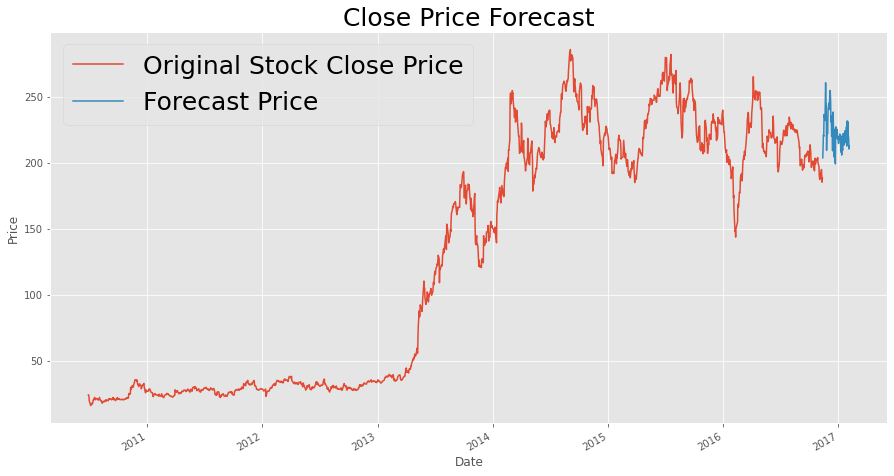

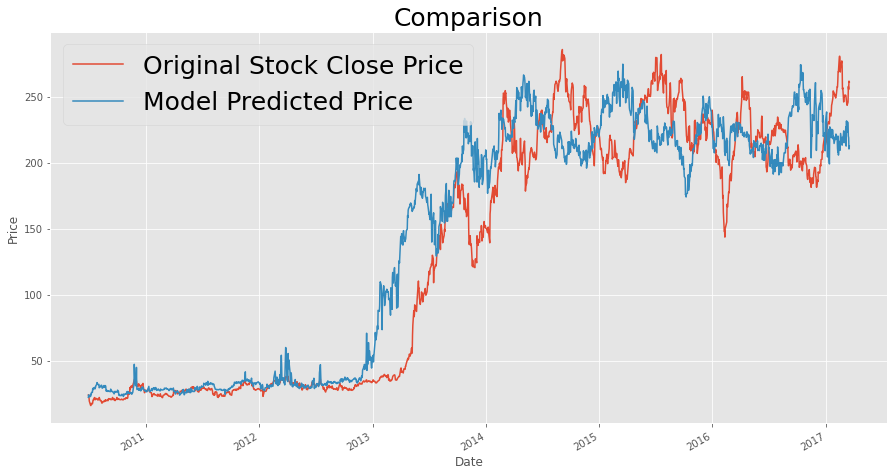

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
utility(model,X,y,x_train,x_test,y_train,y_test)

# Simple Linear Regression

Accuracy Score for Test Data:  0.8779485830832451


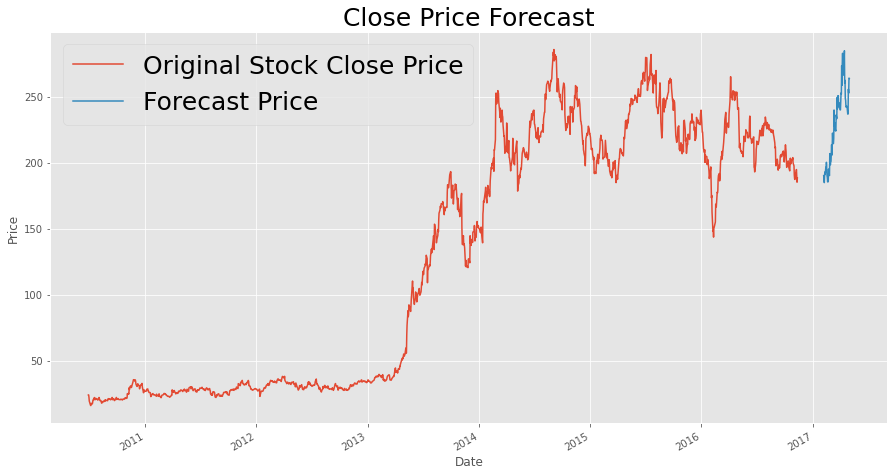

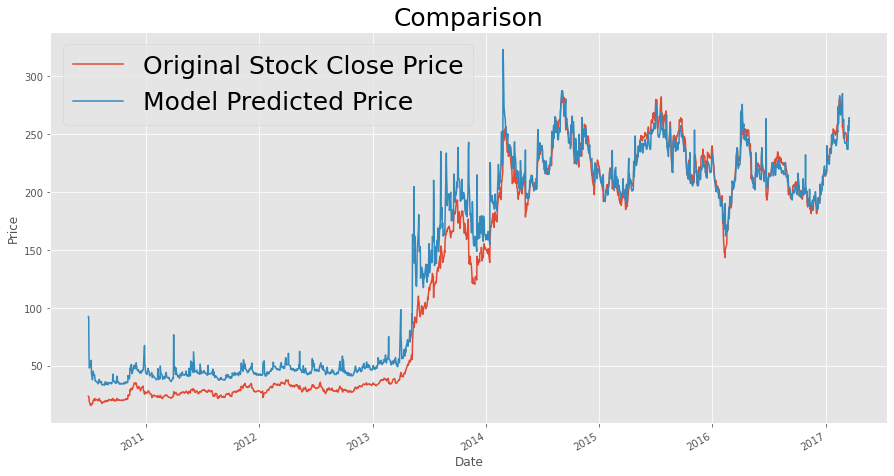

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
utility(model,X,y,x_train,x_test,y_train,y_test)

# Support vector Regressor

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy Score for Test Data:  0.18965599749868134


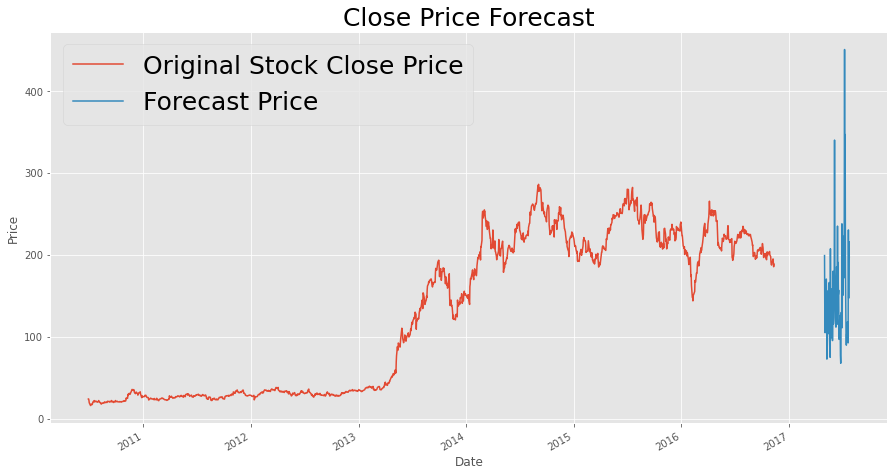

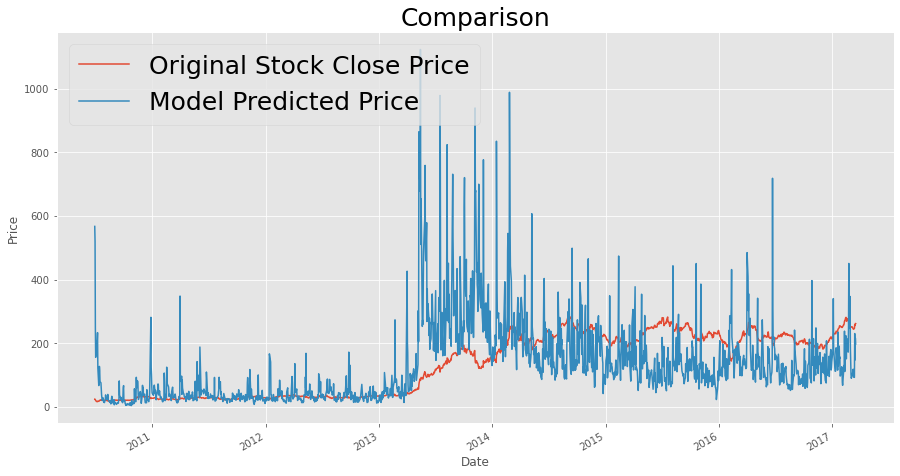

In [14]:
from sklearn.svm import LinearSVR
model = LinearSVR(random_state=0, tol=1e-5)
utility(model,X,y,x_train,x_test,y_train,y_test)

# Decision Tree Regressor

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy Score for Test Data:  0.18965599749868134


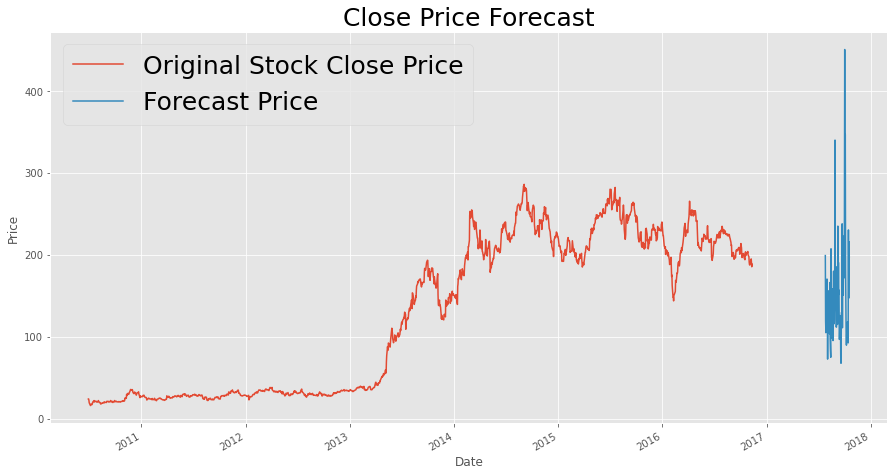

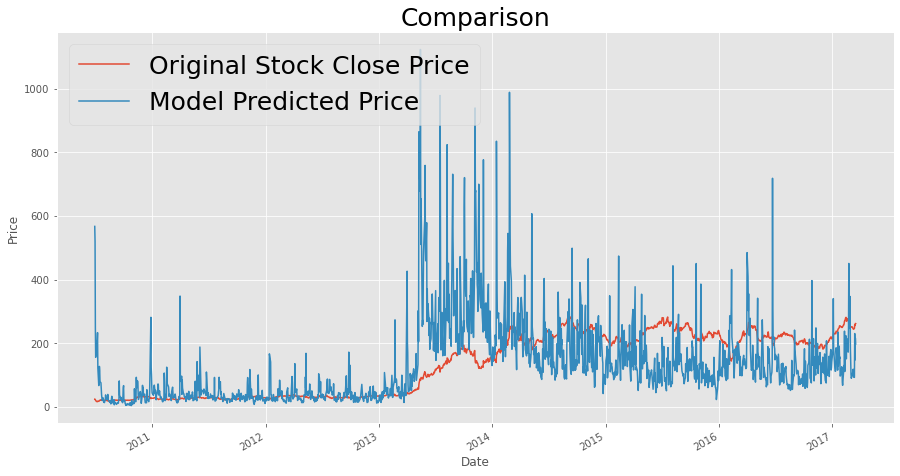

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
utility(model,X,y,x_train,x_test,y_train,y_test)